___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install -U imbalanced-learn

In [255]:
!pip install dtreeviz
!pip install graphviz

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 1.Відкриваю файл та виводжу описову статистику

In [12]:
df = pd.read_csv('loan_data.csv')
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [36]:
df.describe(include=[object]) 

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


### 2.Створюю дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладаються одна на одну.

In [33]:
Not_paid = df['not.fully.paid'] == 0 
Well_paid = df['not.fully.paid'] == 1 
# створюю перетин значень по полю fico для значень not.fully.paid=0
dfNot_paid = df[Not_paid]
x1 = dfNot_paid['fico']
# створюю перетин значень по полю fico для значень not.fully.paid=1
dfWell_paid = df[Well_paid]
x2 = dfWell_paid['fico']


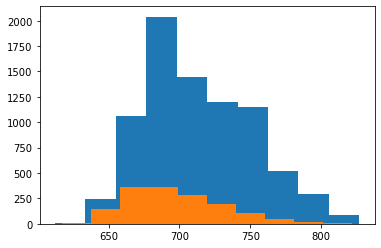

In [34]:
plt.hist(x1)
plt.hist(x2)
plt.show()

###  3.Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

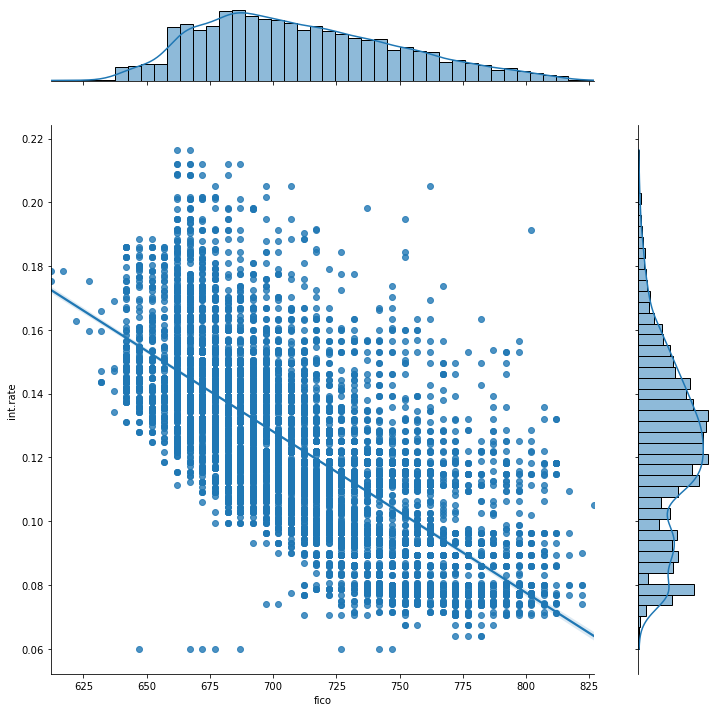

In [40]:
sns.jointplot(data=df, x="fico", y="int.rate", kind="reg",  height=10, ratio=5, space=0.6)

### 4.1.Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. 

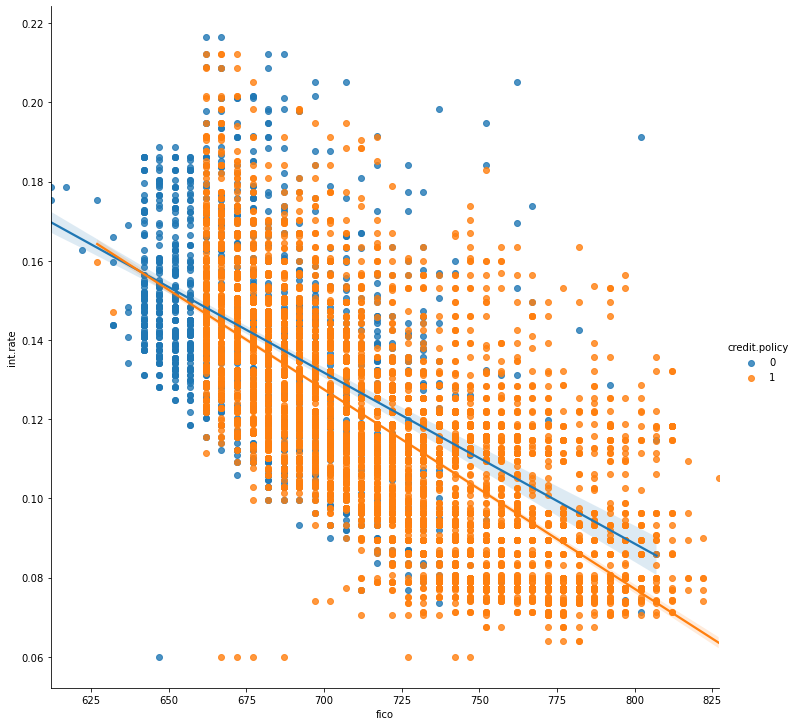

In [46]:
sns.lmplot(x="fico", y="int.rate", hue="credit.policy", data=df, height=10, aspect=1)

### 4.2.Розбиваю по значеннях цільової функції

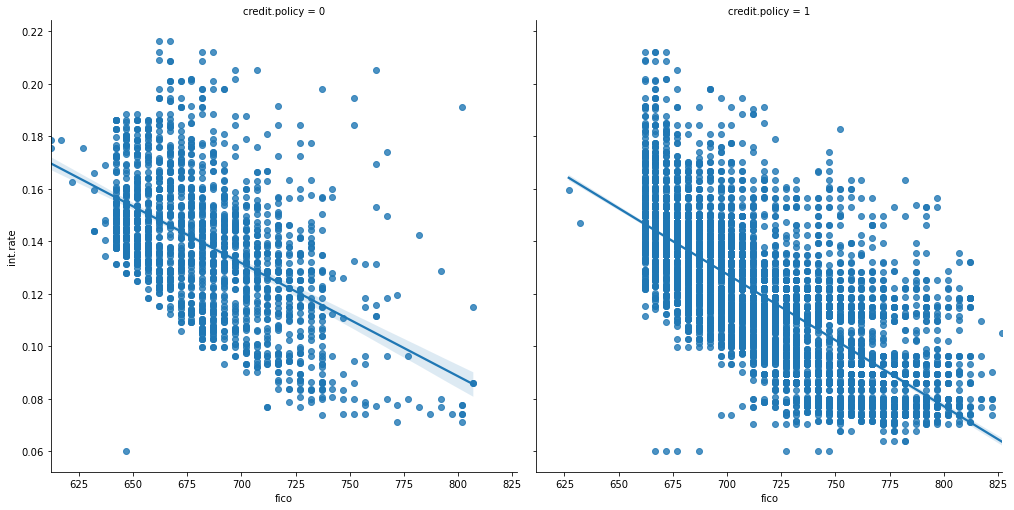

In [48]:
sns.lmplot(x="fico", y="int.rate", col="credit.policy", data=df,height=7, aspect=1)

### 5.purpose є категорією, тому варто перетворити за допомогою pd.get_dummies

In [13]:
df = pd.get_dummies(df, columns=['purpose'])

In [101]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


### 6.Розбийте датасет на тестві та трейнові дані

In [15]:
feature_cols = ['int.rate','fico', 'installment','log.annual.inc', 'dti', 'revol.bal', 'revol.util', 'days.with.cr.line','not.fully.paid']
X = df[feature_cols] # незалежні змінні
y = df['credit.policy'] # залежна змінна
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


### 7-8.Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

### дерево рішень

In [276]:
 from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import *

In [277]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8484342379958246


In [214]:
from sklearn.metrics import accuracy_score

In [212]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [213]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8484


[Text(167.4, 391.392, 'X[1] <= 659.5\ngini = 0.312\nsamples = 7183\nvalue = [1389, 5794]'),
 Text(83.7, 304.416, 'gini = 0.0\nsamples = 357\nvalue = [357, 0]'),
 Text(251.10000000000002, 304.416, 'X[7] <= 1109.979\ngini = 0.257\nsamples = 6826\nvalue = [1032, 5794]'),
 Text(167.4, 217.44, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(334.8, 217.44, 'X[5] <= 105640.5\ngini = 0.23\nsamples = 6682\nvalue = [888, 5794]'),
 Text(167.4, 130.464, 'X[4] <= 24.995\ngini = 0.209\nsamples = 6542\nvalue = [775, 5767]'),
 Text(83.7, 43.488, '\n  (...)  \n'),
 Text(251.10000000000002, 43.488, '\n  (...)  \n'),
 Text(502.20000000000005, 130.464, 'X[5] <= 149574.0\ngini = 0.311\nsamples = 140\nvalue = [113, 27]'),
 Text(418.5, 43.488, '\n  (...)  \n'),
 Text(585.9, 43.488, '\n  (...)  \n')]

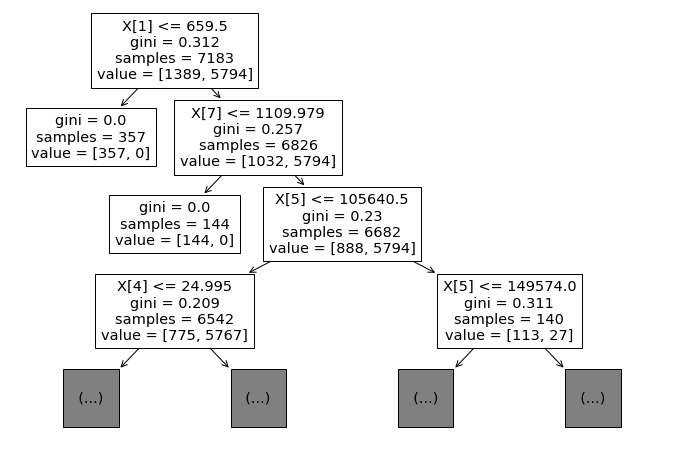

In [220]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train), max_depth=3) 

In [221]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       479
           1       0.90      0.91      0.91      1916

    accuracy                           0.85      2395
   macro avg       0.76      0.76      0.76      2395
weighted avg       0.85      0.85      0.85      2395



### логістична регресія

In [185]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)
logisticRegr.score(X, y)

0.8170808101900188

In [192]:
from sklearn import metrics
from imblearn.metrics import specificity_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[  43,  436],
       [   5, 1911]], dtype=int64)

Text(0.5, 257.44, 'Predicted Сredit policy')

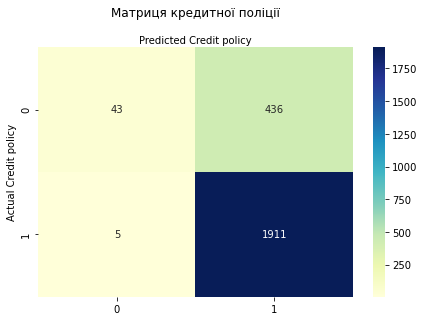

In [187]:
class_names=[0,1] # імена класів
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# створення матриці
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Матриця кредитної поліції', y=1.1)
plt.ylabel('Actual Сredit policy')
plt.xlabel('Predicted Сredit policy')

In [228]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Specificity:",specificity_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9006263048016702
Precision: 0.8987642585551331
Recall: 0.9869519832985386
Specificity: 0.6416492693110647


In [229]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69       479
           1       0.90      0.99      0.94      1916

    accuracy                           0.90      2395
   macro avg       0.91      0.77      0.82      2395
weighted avg       0.90      0.90      0.89      2395



### random forest

In [223]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [224]:
y_pred = classifier.predict(X_test)

In [225]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 266  213]
 [  25 1891]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69       479
           1       0.90      0.99      0.94      1916

    accuracy                           0.90      2395
   macro avg       0.91      0.77      0.82      2395
weighted avg       0.90      0.90      0.89      2395

Accuracy: 0.9006263048016702


### XGBoost

In [231]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [18]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [19]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [20]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[23:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [237]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.386058


In [239]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [240]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.481304,0.000430,0.481501,0.000298
1,0.462900,0.001366,0.463356,0.000671
2,0.446520,0.002504,0.447377,0.000824
3,0.433264,0.003474,0.434070,0.001266
4,0.420090,0.006313,0.420981,0.003817


In [297]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.304156
Name: test-rmse-mean, dtype: float64


### 10.Використання ансамблю voting для всіх моделей

In [308]:
from sklearn.ensemble import VotingClassifier
models = [('clf', DecisionTreeClassifier(max_depth=5)), ('logisticRegr',LogisticRegression()),('classifier', RandomForestClassifier(n_estimators = 50))]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[ 250  229]
 [   5 1911]]
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       479
           1       0.89      1.00      0.94      1916

    accuracy                           0.90      2395
   macro avg       0.94      0.76      0.81      2395
weighted avg       0.91      0.90      0.89      2395



### 11.Порівняйте результати моделей та зробіть висновки

У підсумку використання трьох методів дерева рішень, лінійної регресії та RandomForest усі три моделі показали подібні результати, трошки кращі передбачення зробила модель RandomForest та лінійна регресія, найкраще можна натренувати усі моделі передбачати ситуації коли видадуть кредит(можна досягнути практично 100% точності передбачення після тренування для модеейі RandomForest та лінійна регресія). Гірший результат моделі показали для випадків коли відмовляють у видачі кредиту тут максимальної точності передбачень можна досягнути лише у 69% випадків. Можливо, це повязано з тим(на що вказує описова статистика), що у даному Датасеті більшість розгянутих кредитних справ отримали схвальне рішення щодо видачі кредиту.
За допомогою XGBoost розраховано похибку RMSE: спочатку вона була близько 0,39, за допомогою навчання її вдалося покращити до значення близького до 0,3. Це не найкращий результат, проте дане значення свідчить про те що модель може релевантно прогнозувати результат. 
Застосування ансамблю Voting для трьох методів дерева рішень, лінійної регресії та RandomForest значимо не змінив результат.
Для оптимізації результату можна надалі краще маніпулювати змінними та параметрами обраних методів аналізу

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [348]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [350]:
df_time = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv')

In [351]:
df_time.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


### 1.Виведіть список унікальних міст з датасету

In [352]:
pd.Series(df_time['city']).unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### 2.Виведіть дату початку та кінця ведення даних

In [353]:
df_time["date.utc"]= pd.to_datetime(df_time["date.utc"])

In [329]:
df_time["date.utc"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [330]:
df_time["date.utc"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

### 3. Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)?

In [354]:
df_time = df_time.set_index("date.utc")


In [344]:
df_time.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [384]:
data_columns = ["value"]
df_time_weekly_mean = df_time.groupby(['city'])[data_columns].resample('D').mean().round(2)# кожен день концентрацыя
df_time_weekly_mean

value
city      date.utc                        
Antwerpen 2019-05-07 00:00:00+00:00  47.75
          2019-05-08 00:00:00+00:00  21.75
          2019-05-09 00:00:00+00:00  20.25
          2019-05-10 00:00:00+00:00  11.00
          2019-05-11 00:00:00+00:00  23.75
...                                    ...
Paris     2019-06-17 00:00:00+00:00  34.40
          2019-06-18 00:00:00+00:00  40.02
          2019-06-19 00:00:00+00:00  26.95
          2019-06-20 00:00:00+00:00  22.25
          2019-06-21 00:00:00+00:00  20.00

[130 rows x 1 columns]

### 4.Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [387]:
data_columns = ["value"]
df_time_7d_rol = df_time[data_columns].rolling(window = 7, center = True).mean().round(2)# погодинне середнє значення


Text(0.5, 1.0, 'Concentration NO2 by days hour')

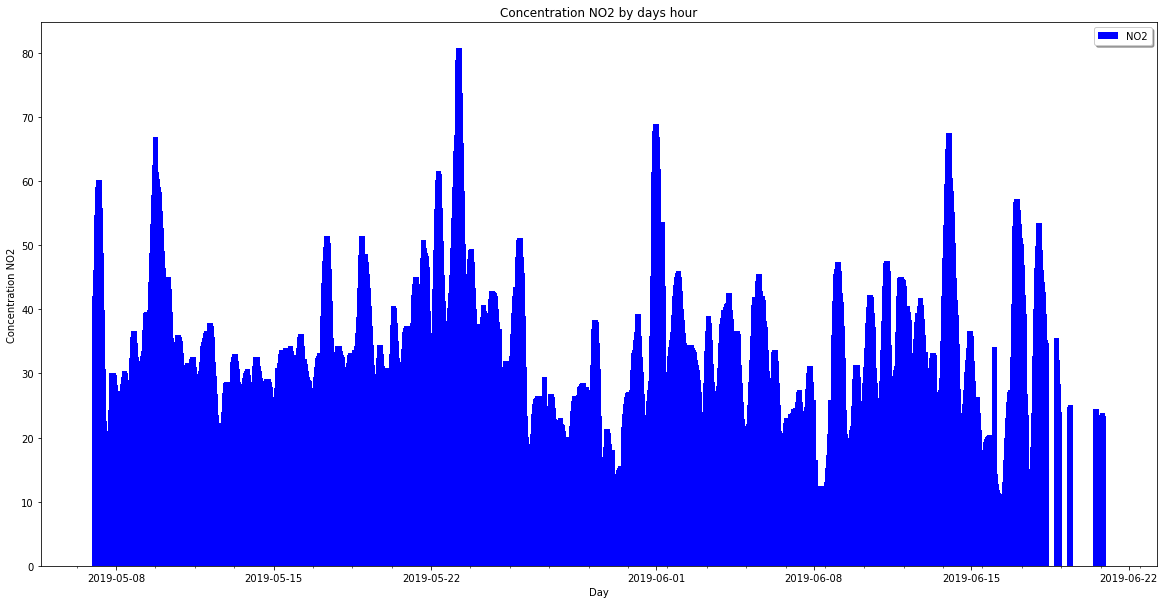

In [412]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(x = df_time.index, height = df_time_7d_rol['value'], color='blue', align='center', width=0.25)
ax.legend(['NO2'], loc='upper right',  shadow=True)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Day')
ax.set_ylabel('Concentration NO2')
ax.set_title('Concentration NO2 by days hour')